In [186]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
import re
from numpy import ma
import numpy
import networkx as nx
%matplotlib inline
# %matplotlib notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

In [8]:
# https://bougui505.github.io/2016/08/31/compute_the_shortest_path_on_a_grid_using_python.html
def muller_potential(x, y, use_numpy=False):
    """Muller potential
    Parameters
    ----------
    x : {float, np.ndarray, or theano symbolic variable}
    X coordinate. If you supply an array, x and y need to be the same shape,
    and the potential will be calculated at each (x,y pair)
    y : {float, np.ndarray, or theano symbolic variable}
    Y coordinate. If you supply an array, x and y need to be the same shape,
    and the potential will be calculated at each (x,y pair)
    Returns
    -------
    potential : {float, np.ndarray, or theano symbolic variable}
    Potential energy. Will be the same shape as the inputs, x and y.
    Reference
    ---------
    Code adapted from https://cims.nyu.edu/~eve2/ztsMueller.m
    """
    aa = [-1, -1, -6.5, 0.7]
    bb = [0, 0, 11, 0.6]
    cc = [-10, -10, -6.5, 0.7]
    AA = [-200, -100, -170, 15]
    XX = [1, 0, -0.5, -1]
    YY = [0, 0.5, 1.5, 1]
    # use symbolic algebra if you supply symbolic quantities
    exp = np.exp
    value = 0
    for j in range(0, 4):
        if use_numpy:
            value += AA[j] * np.exp(aa[j] * (x - XX[j])**2 + bb[j] * (x - XX[j]) * (y - YY[j]) + cc[j] * (y - YY[j])**2)
        else: # use sympy
            value += AA[j] * sympy.exp(aa[j] * (x - XX[j])**2 + bb[j] * (x - XX[j]) * (y - YY[j]) + cc[j] * (y - YY[j])**2)
    return value

In [71]:
all_data = pd.read_feather("/Users/weilu/Research/data/pulling/19_Feb_data_1.feather")

In [347]:
test = all_data.query("temp=='400'").query("perturbation=='original'").query("mode=='2d_z_qw'")

In [348]:
x=1
y=2
z=3
zmin = 0
zmax=20
data = test[["index", "x","y","f"]].values
#         print(data)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]
size = 20
xi = np.linspace(min(data[:,x]), max(data[:,x]), size)
yi = np.linspace(min(data[:,y]), max(data[:,y]), size)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')

In [351]:
np.unravel_index(V.argmin(), V.shape)

(15, 13)

In [353]:
np.unravel_index(V.argmin(), V.shape)

(15, 13)

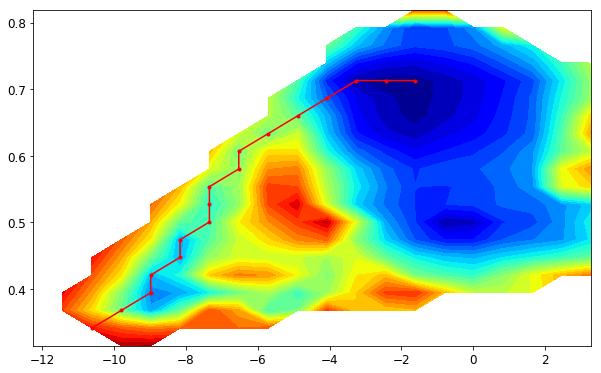

In [355]:
source = np.unravel_index(V.argmin(), V.shape)
# source = (17,35)
path = shortestPath(source, (1,2), P)
plt.contourf(xi, yi, V, 30, cmap='jet')
# plt.plot(path[:,1], path[:,0], 'r.-')
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')

In [356]:
f_on_path = [zi[tuple(p)] for p in path]

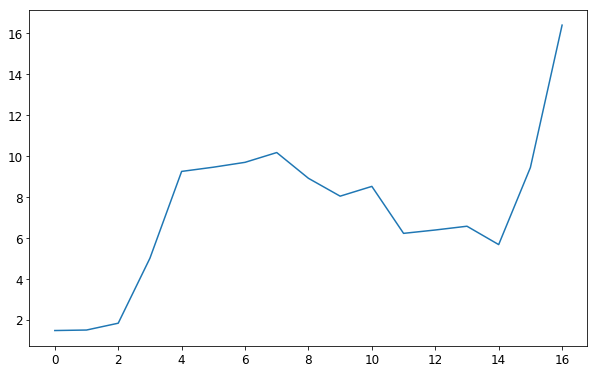

In [357]:
plt.plot(f_on_path)

In [368]:
location = "/Users/weilu/Research/server_backup/feb_2018/week_of_feb12/freeEnergy_rg_0.1_lipid_1.0_mem_1_2/rg_0.1_lipid_1.0_mem_1_350-550/expected_z_2d/force_0.0/"
data = np.loadtxt(location+"evpb-400.dat")
zmin = 5
zmax=50
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]
size = 20
xi = np.linspace(min(data[:,x]), max(data[:,x]), size)
yi = np.linspace(min(data[:,y]), max(data[:,y]), size)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')

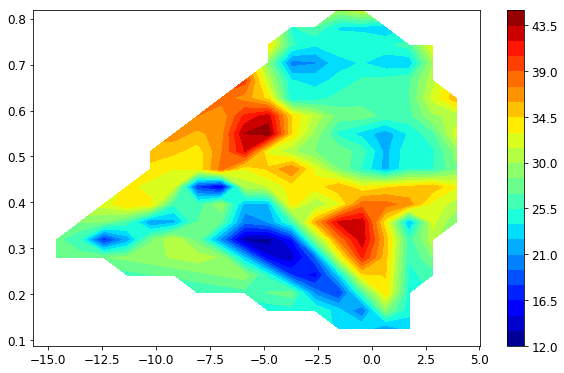

In [378]:
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.colorbar()

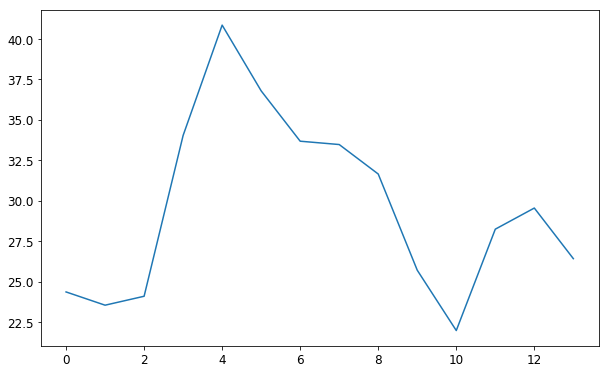

In [370]:
f_on_path = [zi[tuple(p)] for p in path]
plt.plot(f_on_path)

In [244]:
zi[tuple([15,13])]

1.4654172317080323

In [246]:
[zi[tuple(p)] for p in path]

[1.4654172317080323,
 1.4897735398697418,
 1.8239889409141641,
 5.0036024103737669,
 9.2511343707093801,
 9.4571667466056475,
 9.6956800916834744,
 10.174199147944817,
 8.9136975545310158,
 8.0401872173687536,
 8.5187062736300945,
 6.2201316800246582,
 6.3846943430540319,
 6.5691211594203072,
 5.6705467887109151]

In [241]:
zi[15,13]

1.4654172317080323

In [240]:
path

array([[15, 13],
       [15, 12],
       [15, 11],
       [14, 10],
       [13,  9],
       [12,  8],
       [11,  7],
       [10,  7],
       [ 9,  6],
       [ 8,  6],
       [ 7,  6],
       [ 6,  5],
       [ 5,  5],
       [ 4,  4],
       [ 3,  4]])

In [374]:
xrange = (xi>-6) & (xi<-5)
yrange = (yi >0.6) & (yi < 0.7)

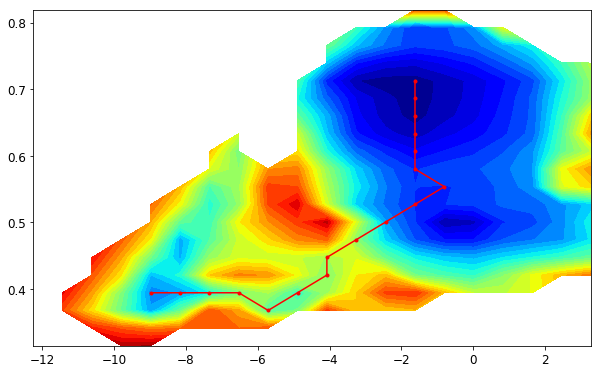

In [375]:
x=1
y=2
z=3
zmin = 0
zmax=20
data = test[["index", "x","y","f"]].values
#         print(data)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
zi = np.where(np.isnan(zi), 50, zi)
zi[yrange[:,np.newaxis] * xrange] = 50 
V = ma.masked_array(zi, zi>40)
D, P = dijkstra(V)
path = shortestPath(np.unravel_index(V.argmin(), V.shape), (3,4), P)
plt.contourf(xi, yi, V, 30, cmap='jet')
# plt.plot(path[:,1], path[:,0], 'r.-')
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')

In [345]:
f_on_path = [zi[tuple(p)] for p in path]

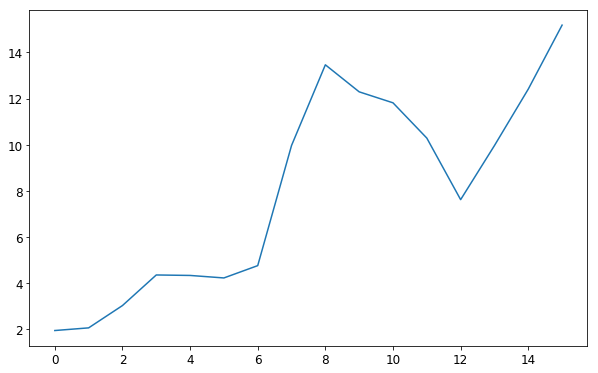

In [346]:
plt.plot(f_on_path)

In [376]:
location = "/Users/weilu/Research/server_backup/feb_2018/week_of_feb12/freeEnergy_rg_0.1_lipid_1.0_mem_1_2/rg_0.1_lipid_1.0_mem_1_350-550/expected_z_2d/force_0.0/"
data = np.loadtxt(location+"evpb-400.dat")
zmin = 5
zmax=50
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]
size = 20
xi = np.linspace(min(data[:,x]), max(data[:,x]), size)
yi = np.linspace(min(data[:,y]), max(data[:,y]), size)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')

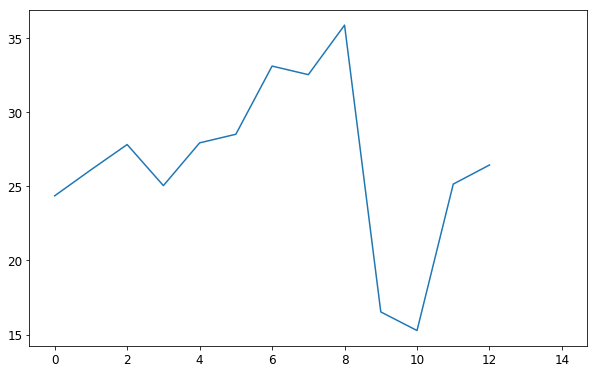

In [377]:
f_on_path = [zi[tuple(p)] for p in path]
plt.plot(f_on_path)

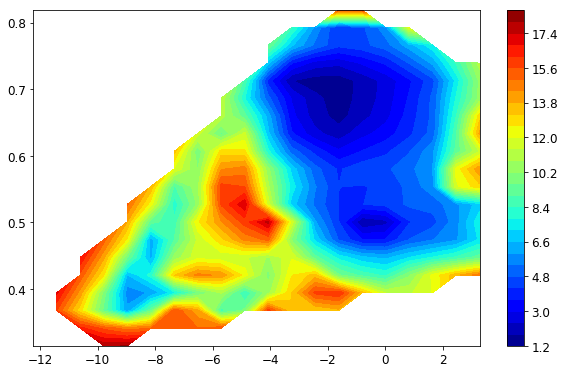

In [81]:
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.colorbar()
# plt.xlim(min, zmax)
# plt.set_clim(zmin, zmax)

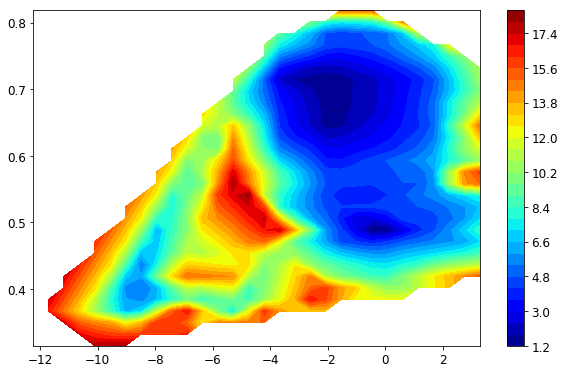

In [78]:
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.colorbar()
# plt.xlim(min, zmax)
# plt.set_clim(zmin, zmax)

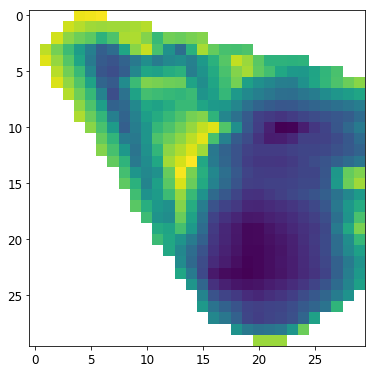

In [79]:
plt.imshow(zi)

In [65]:
zi.shape

(20, 20)

In [46]:
minx=-1.5
maxx=1.2
miny=-0.2
maxy=2
ax=None
grid_width = max(maxx-minx, maxy-miny) / 50.0
xx, yy = np.mgrid[minx : maxx : grid_width, miny : maxy : grid_width]
V = muller_potential(xx, yy, use_numpy=True)

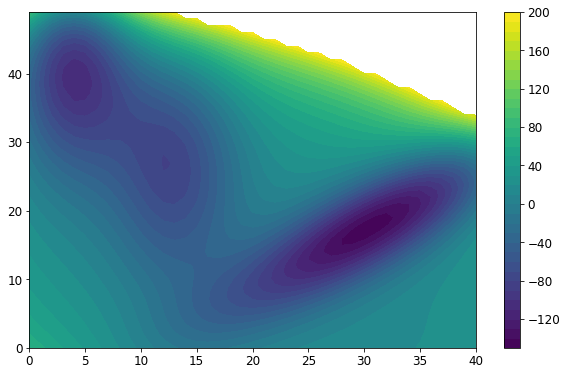

In [11]:
minx=-1.5
maxx=1.2
miny=-0.2
maxy=2
ax=None
grid_width = max(maxx-minx, maxy-miny) / 50.0
xx, yy = np.mgrid[minx : maxx : grid_width, miny : maxy : grid_width]
V = muller_potential(xx, yy, use_numpy=True)
V = ma.masked_array(V, V>200)
plt.contourf(V, 40)
tmp = plt.colorbar()

In [45]:
V.mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

In [25]:
def dijkstra(V):
    mask = V.mask
    visit_mask = mask.copy() # mask visited cells
    m = np.ones_like(V) * np.inf
    connectivity = [(i,j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (not (i == j == 0))]
    cc = np.unravel_index(V.argmin(), m.shape) # current_cell
    m[cc] = 0
    P = {}  # dictionary of predecessors 
    #while (~visit_mask).sum() > 0:
    for _ in range(V.size):
        #print cc
        neighbors = [tuple(e) for e in np.asarray(cc) - connectivity 
                     if e[0] > 0 and e[1] > 0 and e[0] < V.shape[0] and e[1] < V.shape[1]]
        neighbors = [ e for e in neighbors if not visit_mask[e] ]
        tentative_distance = np.asarray([V[e]-V[cc] for e in neighbors])
        for i,e in enumerate(neighbors):
            d = tentative_distance[i] + m[cc]
            if d < m[e]:
                m[e] = d
                P[e] = cc
        visit_mask[cc] = True
        m_mask = ma.masked_array(m, visit_mask)
        cc = np.unravel_index(m_mask.argmin(), m.shape)
    return m, P

In [26]:
D, P = dijkstra(V)

In [155]:
np.unravel_index(V.argmin(), V.shape)

(15, 13)

In [145]:
>>> A=numpy.matrix([[1,1],[2,1]])
>>> G=nx.from_numpy_matrix(A)

In [148]:
G.graph

{}

In [119]:
np.unravel_index(V.argmin(), V.shape)

(15, 13)

In [28]:
def shortestPath(start, end, P):
    Path = []
    step = end
    while 1:
        Path.append(step)
        if step == start: break
        step = P[step]
    Path.reverse()
    return np.asarray(Path)

In [30]:
path = shortestPath(np.unravel_index(V.argmin(), V.shape), (40,4), P)

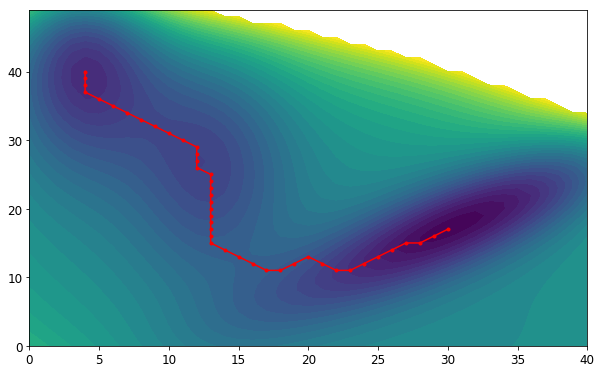

In [31]:
plt.contourf(V, 40)
plt.plot(path[:,1], path[:,0], 'r.-')

In [42]:
def get_neighbors(cc, V, visited_nodes):
    connectivity = [(i,j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (not (i == j == 0))]
    neighbors = [tuple(e) for e in np.asarray(cc) - connectivity 
                 if e[0] > 0 and e[1] > 0 and e[0] < V.shape[0] and e[1] < V.shape[1]]
    neighbors = [ e for e in neighbors if e not in visited_nodes ]
    return neighbors

def extend_path(V, path, n):
    """
    Extend the given path with n steps
    """
    path = [tuple(e) for e in path]
    do_break = False
    visited_nodes = set()
    for _ in range(n):
        visited_nodes.update(path)
        dist_min = numpy.inf
        for i_cc, cc in enumerate(path[:-1]):
            neighbors = get_neighbors(cc, V, visited_nodes)
            next_step = path[i_cc+1]
            next_neighbors = get_neighbors(next_step, V, visited_nodes)
            join_neighbors = list(set(neighbors) & set(next_neighbors))
            if len(join_neighbors) > 0:
                tentative_distance = [ V[e] for e in join_neighbors ]
                argmin_dist = np.argmin(tentative_distance)
                if tentative_distance[argmin_dist] < dist_min:
                    dist_min, new_step, new_step_index  = tentative_distance[argmin_dist], join_neighbors[argmin_dist], i_cc+1
        path.insert(new_step_index, new_step)
    return path

43 293


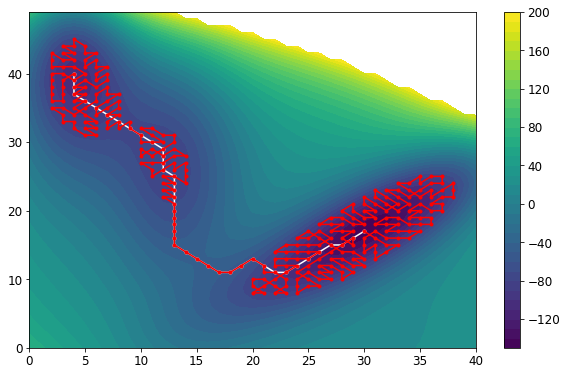

In [43]:
path_ext = extend_path(V, path, 250)
print(len(path), len(path_ext))
path_ext = numpy.asarray(path_ext)
plt.contourf(V, 40)
plt.plot(path[:,1], path[:,0], 'w.-')
plt.plot(path_ext[:,1], path_ext[:,0], 'r.-')
plt.colorbar()